<a href="https://colab.research.google.com/github/kimmich001207-art/Kimmich/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = kagglehub.dataset_download("uciml/iris")

Using Colab cache for faster access to the 'iris' dataset.


In [ ]:
import os

df=pd.read_csv(os.path.join(path, "Iris.csv"))
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


# 3

In [ ]:
cols=df.drop(columns=['Id','Species']).columns

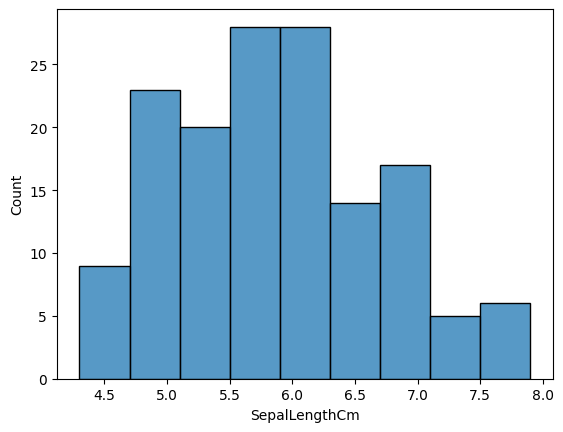

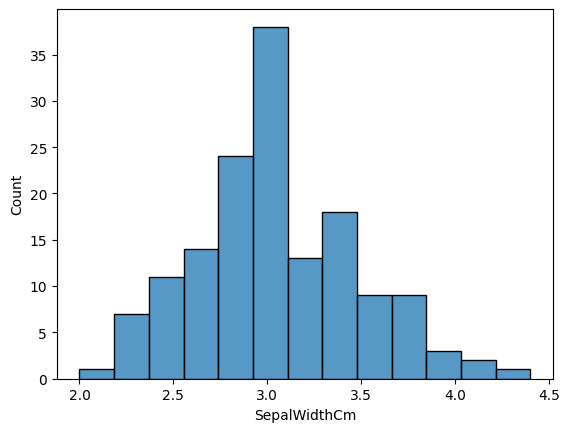

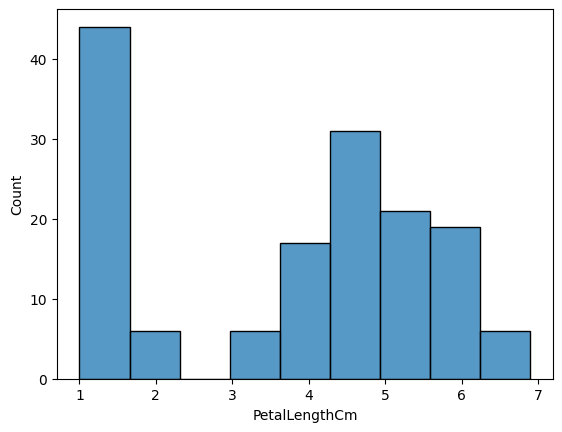

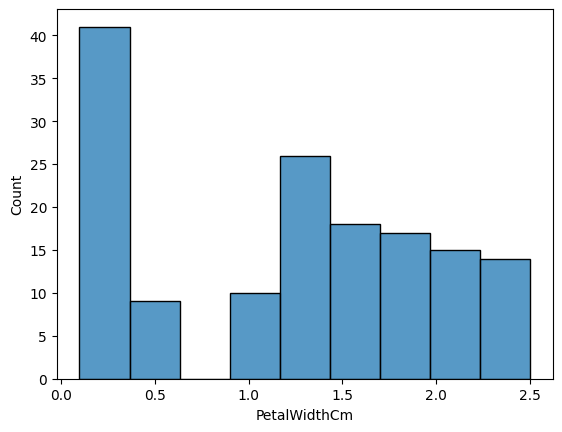

In [ ]:
for col in cols:
  sns.histplot(data=df,x=df[col])
  plt.show()

# 4

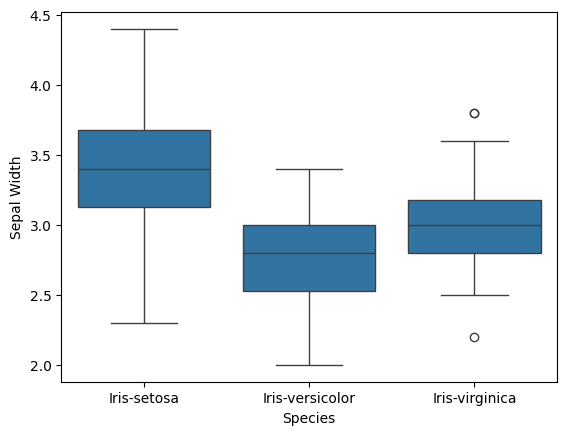

In [ ]:
sns.boxplot(data=df,x=df['Species'],y=df['SepalWidthCm'])
plt.xlabel('Species')
plt.ylabel("Sepal Width")
plt.show()

# 5

Text(0.5, 1.0, 'Correlation Matrix of Iris Features')

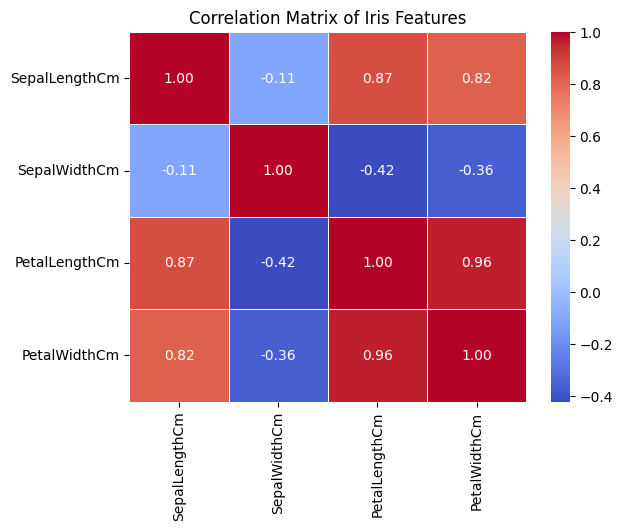

In [ ]:
correlation_matrix =df[cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Iris Features')

# 6

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df['ratio']=df['PetalLengthCm']/df['SepalLengthCm']

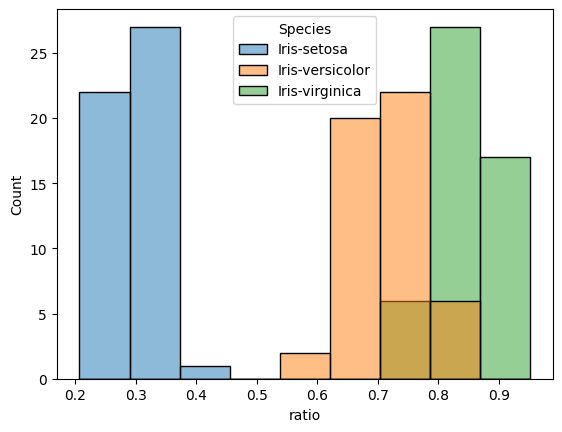

In [ ]:
sns.histplot(data=df,x=df['ratio'],hue=df['Species'])
plt.show()

<Axes: xlabel='Species', ylabel='ratio'>

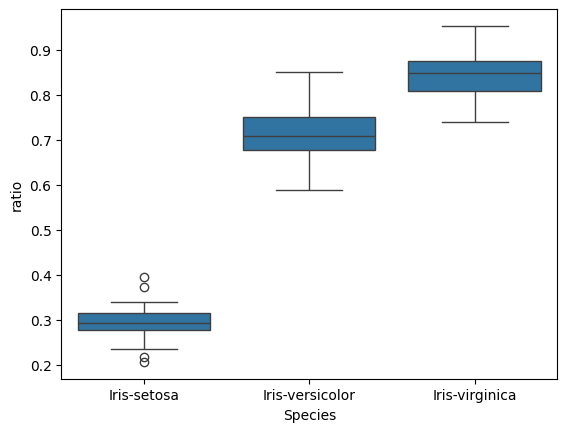

In [ ]:
sns.boxplot(data=df,x='Species',y='ratio')

SepalLength has high correlation with PetalLength and Petalwidth.  Those three features are the most important.

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

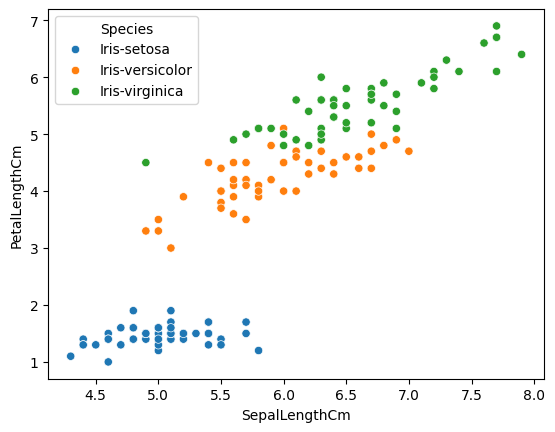

In [ ]:
sns.scatterplot(data=df,x=df['SepalLengthCm'],y=df['PetalLengthCm'],hue=df['Species'])

The new feature has a correlation coefficient of approximately 0.938 with the species label. This is extremely high, indicating that it is a powerful predictor for classification models. It reduces the dimension making it easily to observe and find the classification.

# Logistic

In [ ]:
Y=df['Species']
X=df.drop(columns=['Id','Species'])

In [ ]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

# Let's check the results
#print(X_train.head())
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 5)
(30, 5)
(120,)
(30,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

Logistic=LogisticRegression()

Logistic.fit(X_train,y_train)
y_pred=Logistic.predict(X_test)


print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
y_pred2=knn.predict(X_test_scaled)

print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

0.9666666666666667


In [32]:
from sklearn.model_selection import GridSearchCV

knn2=KNeighborsClassifier()

param_grid={
    'n_neighbors':list(range(1,11)),
    #'weights':['uniform','distance'], # weights: 尝试 'uniform' (均匀权重) 和 'distance' (按距离远近加权)
    #'metric':['euclidean','manhattan'] # 还可以尝试不同的距离度量方式

}

# cv=5 表示进行 5 折交叉验证
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 4. 执行搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数组合
print(f"best params: {grid_search.best_params_}")
print(f"best_score: {grid_search.best_score_:.4f}")

# 使用搜寻到的最佳模型在测试集上预测
best_knn = grid_search.best_estimator_
test_score = best_knn.score(X_test, y_test)

print(f"test_score: {test_score:.4f}")

best params: {'n_neighbors': 5}
best_score: 0.9750
test_score: 1.0000


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisiontree=DecisionTreeClassifier(max_leaf_nodes=4)

decisiontree.fit(X_train,y_train)

y_pred3=decisiontree.predict(X_test)

print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

0.9666666666666667
